## 1. Set Up Project Paths and Inspect Data Folder

In this step, I:

- Import `Path` and `os` to work with file paths.
- Define the current working directory (`CWD`) based on where this notebook lives.
- Build a `DATA_DIR` path that points one level up to the shared `data` folder for the project.
- Print out:
  - The current working directory (so I can confirm I’m in the right project).
  - All files in `DATA_DIR` (to double-check that `degree.csv` and `occupation_industry.csv` are available).


In [9]:
from pathlib import Path
import pandas as pd
import os

# Project paths
CWD = Path().cwd()
DATA_DIR = CWD.parent / "data"

print("Current working directory:", CWD)
print("Files in DATA_DIR:", os.listdir(DATA_DIR))


Current working directory: /Users/juliakelly/DataspellProjects/AC547_Final_Project/notebooks
Files in DATA_DIR: ['C2024_a.csv', 'occupation_industry.csv', 'c2019_a_rv.csv', 'occupation_age_cleaned.csv', 'c2021_a_rv.csv', 'c2020_a_rv.csv', 'C2023_a_rV.csv.zip', 'national_M2023_dl (1).xlsx', 'c2021_a_rv.csv.zip', 'national_M2021_dl.xlsx', 'c2020_a_rv.csv.zip', 'C2024_a.csv.zip', 'national_M2022_dl (1).xlsx', 'national_M2024_dl (2).xlsx', 'degree.csv', 'C2023_a_rV.csv']


### 2. Import all libraries and set global plot styles
Here I import NumPy, pandas, Matplotlib, and Statsmodels.
I also define global plot settings for consistent, clean visuals throughout the analysis.


In [10]:

from pathlib import Path
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# --- global plot style (same vibe as your IPUMS notebook) ---
plt.rcParams["font.size"] = 12
plt.rcParams["axes.titlesize"] = 18
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["legend.fontsize"] = 12
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["axes.grid"] = True

# --- project paths ---
CWD = Path().cwd()
DATA_DIR = CWD.parent / "data"

print("CWD:", CWD)
print("DATA_DIR contents:", os.listdir(DATA_DIR))


CWD: /Users/juliakelly/DataspellProjects/AC547_Final_Project/notebooks
DATA_DIR contents: ['C2024_a.csv', 'occupation_industry.csv', 'c2019_a_rv.csv', 'occupation_age_cleaned.csv', 'c2021_a_rv.csv', 'c2020_a_rv.csv', 'C2023_a_rV.csv.zip', 'national_M2023_dl (1).xlsx', 'c2021_a_rv.csv.zip', 'national_M2021_dl.xlsx', 'c2020_a_rv.csv.zip', 'C2024_a.csv.zip', 'national_M2022_dl (1).xlsx', 'national_M2024_dl (2).xlsx', 'degree.csv', 'C2023_a_rV.csv']


### 3. Load the degree and occupation/industry datasets
This step reads the CPS microdata into pandas DataFrames and prints their shapes to verify successful loading.


In [11]:
degree_path = DATA_DIR / "degree.csv"
occ_path    = DATA_DIR / "occupation_industry.csv"

degree = pd.read_csv(degree_path, low_memory=False)
occ_ind = pd.read_csv(occ_path,   low_memory=False)

print("Degree shape:", degree.shape)
print("Occ/Ind shape:", occ_ind.shape)

degree.head()



Degree shape: (32244815, 16)
Occ/Ind shape: (32244815, 12)


,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,EDUC,EDUCD,DEGFIELD,DEGFIELDD,DEGFIELD2,DEGFIELD2D
0,2013,201301,1,84,65.0,2013000000011,260001,4,1,65.0,7,71,0,0,0,0
1,2013,201301,2,154,51.0,2013000000021,250001,1,1,51.0,8,81,0,0,0,0
2,2013,201301,2,154,51.0,2013000000021,250001,1,2,62.0,6,63,0,0,0,0
3,2013,201301,2,154,51.0,2013000000021,250001,1,3,232.0,7,71,0,0,0,0
4,2013,201301,2,154,51.0,2013000000021,250001,1,4,97.0,7,71,0,0,0,0


### 4. Explore the structure of the degree dataset
A quick inspection of column types, missing values, and overall structure.


In [12]:
degree.head()
degree.info()
degree.describe(include="all")



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32244815 entries, 0 to 32244814
Data columns (total 16 columns):
 #   Column      Dtype  
---  ------      -----  
 0   YEAR        int64  
 1   SAMPLE      int64  
 2   SERIAL      int64  
 3   CBSERIAL    int64  
 4   HHWT        float64
 5   CLUSTER     int64  
 6   STRATA      int64  
 7   GQ          int64  
 8   PERNUM      int64  
 9   PERWT       float64
 10  EDUC        int64  
 11  EDUCD       int64  
 12  DEGFIELD    int64  
 13  DEGFIELDD   int64  
 14  DEGFIELD2   int64  
 15  DEGFIELD2D  int64  
dtypes: float64(2), int64(14)
memory usage: 3.8 GB


,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,EDUC,EDUCD,DEGFIELD,DEGFIELDD,DEGFIELD2,DEGFIELD2D
count,3.224482e+07,3.224482e+07,3.224482e+07,3.224482e+07,3.224482e+07,3.224482e+07,3.224482e+07,3.224482e+07,3.224482e+07,3.224482e+07,3.224482e+07,3.224482e+07,3.224482e+07,3.224482e+07,3.224482e+07,3.224482e+07
mean,2.017888e+03,2.017898e+05,7.067126e+05,1.232644e+12,9.665370e+01,2.017895e+12,4.683141e+05,1.124941e+00,2.076032e+00,1.011249e+02,6.188933e+00,6.432923e+01,1.066654e+01,1.068068e+03,1.167111e+00,1.168820e+02
std,3.265332e+00,3.265332e+02,4.142477e+05,9.851877e+11,8.030700e+01,3.265606e+09,9.161760e+05,5.570208e-01,1.337299e+00,8.554602e+01,3.252027e+00,3.234935e+01,2.050698e+01,2.052868e+03,7.556795e+00,7.566524e+02
min,2.013000e+03,2.013010e+05,1.000000e+00,1.000000e+00,1.000000e+00,2.013000e+12,1.000100e+04,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.015000e+03,2.015010e+05,3.448490e+05,9.666580e+05,5.000000e+01,2.015008e+12,9.002700e+04,1.000000e+00,1.000000e+00,5.100000e+01,5.000000e+00,5.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.018000e+03,2.018010e+05,7.052210e+05,2.018000e+12,7.400000e+01,2.018002e+12,2.200480e+05,1.000000e+00,2.000000e+00,7.700000e+01,6.000000e+00,6.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.021000e+03,2.021010e+05,1.065609e+06,2.021001e+12,1.170000e+02,2.021009e+12,4.200390e+05,1.000000e+00,3.000000e+00,1.220000e+02,8.000000e+00,8.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.023000e+03,2.023010e+05,1.519010e+06,2.023010e+12,3.118000e+03,2.023015e+12,8.100351e+06,5.000000e+00,2.000000e+01,3.596000e+03,1.100000e+01,1.160000e+02,6.400000e+01,6.403000e+03,6.400000e+01,6.403000e+03


### 5. Explore the structure of the occupation/industry dataset
Same exploration for the occupation and industry data.


In [13]:
occ_ind.head()
occ_ind.info()
occ_ind.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32244815 entries, 0 to 32244814
Data columns (total 12 columns):
 #   Column    Dtype  
---  ------    -----  
 0   YEAR      int64  
 1   SAMPLE    int64  
 2   SERIAL    int64  
 3   CBSERIAL  int64  
 4   HHWT      float64
 5   CLUSTER   int64  
 6   STRATA    int64  
 7   GQ        int64  
 8   PERNUM    int64  
 9   PERWT     float64
 10  OCC       int64  
 11  IND       int64  
dtypes: float64(2), int64(10)
memory usage: 2.9 GB


,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,OCC,IND
count,3.224482e+07,3.224482e+07,3.224482e+07,3.224482e+07,3.224482e+07,3.224482e+07,3.224482e+07,3.224482e+07,3.224482e+07,3.224482e+07,3.224482e+07,3.224482e+07
mean,2.017888e+03,2.017898e+05,7.067126e+05,1.232644e+12,9.665370e+01,2.017895e+12,4.683141e+05,1.124941e+00,2.076032e+00,1.011249e+02,2.498396e+03,3.789758e+03
std,3.265332e+00,3.265332e+02,4.142477e+05,9.851877e+11,8.030700e+01,3.265606e+09,9.161760e+05,5.570208e-01,1.337299e+00,8.554602e+01,2.919871e+03,3.744053e+03
min,2.013000e+03,2.013010e+05,1.000000e+00,1.000000e+00,1.000000e+00,2.013000e+12,1.000100e+04,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.015000e+03,2.015010e+05,3.448490e+05,9.666580e+05,5.000000e+01,2.015008e+12,9.002700e+04,1.000000e+00,1.000000e+00,5.100000e+01,0.000000e+00,0.000000e+00
50%,2.018000e+03,2.018010e+05,7.052210e+05,2.018000e+12,7.400000e+01,2.018002e+12,2.200480e+05,1.000000e+00,2.000000e+00,7.700000e+01,1.005000e+03,3.390000e+03
75%,2.021000e+03,2.021010e+05,1.065609e+06,2.021001e+12,1.170000e+02,2.021009e+12,4.200390e+05,1.000000e+00,3.000000e+00,1.220000e+02,4.710000e+03,7.860000e+03
max,2.023000e+03,2.023010e+05,1.519010e+06,2.023010e+12,3.118000e+03,2.023015e+12,8.100351e+06,5.000000e+00,2.000000e+01,3.596000e+03,9.920000e+03,9.920000e+03


### 6. Standardize column names
To ensure consistent processing, I convert all column names in both datasets to lowercase and remove any extra whitespace.


In [30]:
degree_path = DATA_DIR / "degree.csv"
occ_path    = DATA_DIR / "occupation_industry.csv"

degree = pd.read_csv(degree_path, low_memory=False)
occ_ind = pd.read_csv(occ_path,   low_memory=False)

# 🔹 NEW: standardize column names
degree.columns = degree.columns.str.lower().str.strip()
occ_ind.columns = occ_ind.columns.str.lower().str.strip()

print("Degree shape:", degree.shape)
print("Occ/Ind shape:", occ_ind.shape)
print("Degree columns (first 12):", list(degree.columns)[:12])


Degree shape: (32244815, 16)
Occ/Ind shape: (32244815, 12)
Degree columns (first 12): ['year', 'sample', 'serial', 'cbserial', 'hhwt', 'cluster', 'strata', 'gq', 'pernum', 'perwt', 'educ', 'educd']


### 7. Filter datasets to only the variables needed for analysis
Here I keep only the essential demographic and weighting variables from both datasets.


In [31]:
degree = degree[[
    "year", "serial", "pernum", "degfieldd",
    "degfield2d", "educ", "educd", "perwt"
]]

occ_ind = occ_ind[[
    "year", "serial", "pernum", "occ", "ind", "perwt"
]]



### 8. Sort and index the datasets
To align individuals across files, both datasets are sorted and indexed by the CPS person identifiers: year, serial, and pernum.


In [32]:
degree = degree.sort_values(["year", "serial", "pernum"])
occ_ind = occ_ind.sort_values(["year", "serial", "pernum"])

degree = degree.set_index(["year", "serial", "pernum"])
occ_ind = occ_ind.set_index(["year", "serial", "pernum"])


### 9. Create indicator variables for accounting degrees, occupations, and industries
This step identifies:
- Individuals with accounting degrees
- Individuals working in accounting occupations
- Individuals employed in public accounting industries


In [33]:
degree["is_accounting_degree"] = degree[["degfieldd", "degfield2d"]].eq(6201).any(axis=1).astype(int)


In [34]:
occ_ind["is_accountant_occ"] = occ_ind["occ"].isin([800]).astype(int)



In [35]:
occ_ind["is_public_accounting_ind"] = occ_ind["ind"].isin([7280]).astype(int)


### 10. Compute weighted population trends over time
Using CPS person weights (`perwt`), I estimate the weighted population counts for:
- People with accounting degrees
- People in accounting occupations
- People in public accounting industries

All trends are summarized at the **year** level.


In [36]:
deg_trend = (
    degree.groupby("year")
          .apply(lambda x: (x["is_accounting_degree"] * x["perwt"]).sum())
          .reset_index(name="accounting_degree_population")
)


In [37]:
occ_trend = (
    occ_ind.groupby("year")
           .apply(lambda x: (x["is_accountant_occ"] * x["perwt"]).sum())
           .reset_index(name="accountant_occupation_population")
)


In [38]:
ind_trend = (
    occ_ind.groupby("year")
           .apply(lambda x: (x["is_public_accounting_ind"] * x["perwt"]).sum())
           .reset_index(name="public_accounting_population")
)


### 11. Compute unweighted (raw count) trends
Here I repeat the yearly trends without weights to show simple counts of individuals:
- Holding an accounting degree
- Working in an accounting occupation
- Working in public accounting industries


In [39]:
# Accounting degrees (raw count of individuals)
deg_trend_raw = (
    degree.groupby("year")["is_accounting_degree"]
          .sum()
          .reset_index(name="accounting_degree_count")
)

# Accounting occupations (raw count of individuals)
occ_trend_raw = (
    occ_ind.groupby("year")["is_accountant_occ"]
           .sum()
           .reset_index(name="accounting_occupation_count")
)

# Public accounting industry (raw count of individuals)
ind_trend_raw = (
    occ_ind.groupby("year")["is_public_accounting_ind"]
           .sum()
           .reset_index(name="public_accounting_count")
)



### 12. Visualize trends: accounting degrees vs. accounting jobs
This plot compares how the count of people with accounting degrees and the count working as accountants/auditors change over time.


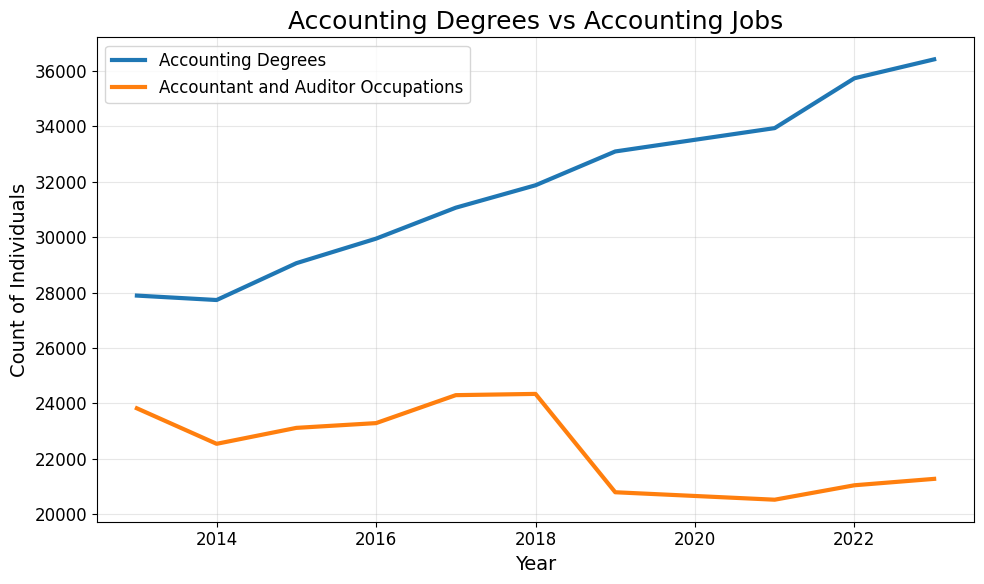

In [41]:
# merge all four trend tables
trend_raw = (
    deg_trend_raw
    .merge(occ_trend_raw, on="year", how="outer")
    .merge(ind_trend_raw, on="year", how="outer")
    .sort_values("year")
)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

plt.plot(
    trend_raw["year"],
    trend_raw["accounting_degree_count"],
    label="Accounting Degrees",
    linewidth=3
)

plt.plot(
    trend_raw["year"],
    trend_raw["accounting_occupation_count"],
    label="Accountant and Auditor Occupations",
    linewidth=3
)




plt.title("Accounting Degrees vs Accounting Jobs")
plt.xlabel("Year")
plt.ylabel("Count of Individuals")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()



### 13. Merge degree and occupation data for accounting-degree holders
In this step I:
1. Reset the indexes so `year`, `serial`, and `pernum` are regular columns.
2. Rebuild a flag for accounting degrees.
3. Keep only the columns needed for merging.
4. Merge degree and occupation records so I can see what jobs accounting-degree holders actually work in.


In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# ---------- 1. Prep dataframes (reset index + lowercase columns) ----------
deg = degree.reset_index().copy()
occ = occ_ind.reset_index().copy()

deg.columns = deg.columns.str.lower()
occ.columns = occ.columns.str.lower()

# ---------- 2. Flag accounting degrees ----------
# Accounting degree if EITHER degfieldd or degfield2d == 6201
deg["is_accounting_degree"] = (
    deg[["degfieldd", "degfield2d"]].eq(6201).any(axis=1)
).astype(int)

# Keep only needed columns
deg_small = deg[["year", "serial", "pernum", "is_accounting_degree"]]
occ_small = occ[["year", "serial", "pernum", "occ"]]

# ---------- 3. Merge and keep only accounting-degree people ----------
merged = pd.merge(
    deg_small,
    occ_small,
    on=["year", "serial", "pernum"],
    how="inner"
)

acc_only = merged[
    (merged["is_accounting_degree"] == 1) &
    (merged["occ"].notna()) &
    (merged["occ"] > 0)
].copy()


### 14. Classify occupations and plot 2023 breakdown for accounting-degree holders
If the merged dataset is not empty, I:
- Convert `occ` to integer.
- Map CPS occupation codes into meaningful categories (accountant, bookkeeping, tax, executive, etc.).
- Count how many accounting-degree holders fall into each category in 2023.
- Create a pie chart showing the share of each occupation category.


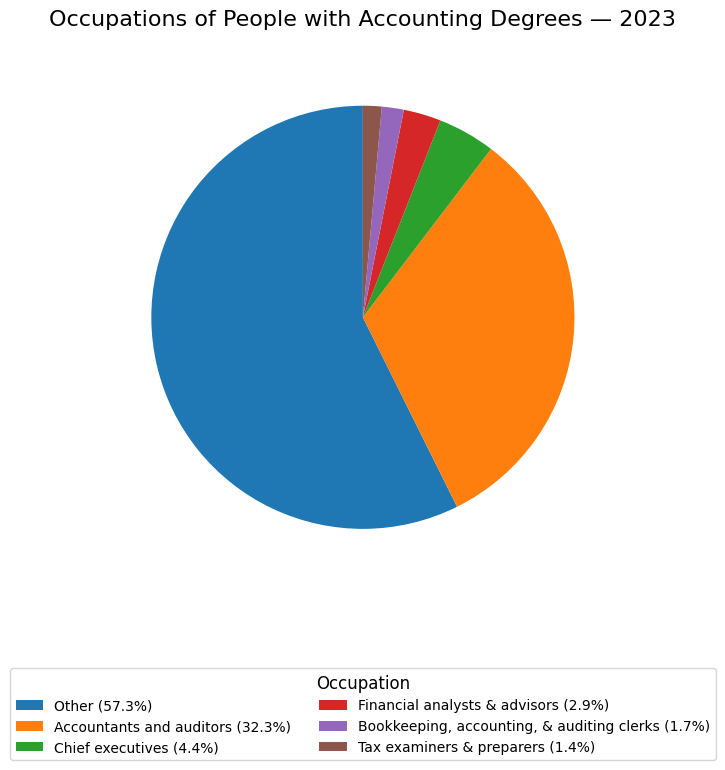

In [51]:
if acc_only.empty:
    print("No merged records with accounting degrees (degfieldd/degfield2d == 6201) were found.")
else:
    # Ensure OCC is integer for mapping
    acc_only["occ"] = pd.to_numeric(acc_only["occ"], errors="coerce").astype("Int64")

    # ---------- 4. Map OCC codes to requested occupation categories ----------
    occ_map = {
        800: "Accountants and auditors (800)",
        5120: "Bookkeeping, accounting, & auditing clerks (5120)",
        845: "Financial analysts & advisors (845, 850)",
        850: "Financial analysts & advisors (845, 850)",
        930: "Tax examiners & preparers (930, 940)",
        940: "Tax examiners & preparers (930, 940)",
        10:  "Chief executives (10)",
    }

    acc_only["occ_category"] = acc_only["occ"].map(occ_map).fillna("Other")

    # ---------- 5. Count categories ----------
    category_counts = acc_only["occ_category"].value_counts()

    # ---------- 6. Pie chart with legend ----------
import matplotlib.pyplot as plt

# Filter to 2023 accounting-degree holders
acc_2023 = acc_only[acc_only["year"] == 2023].copy()

# Count categories
category_counts = acc_2023["occ_category"].value_counts()
total = category_counts.sum()

fig, ax = plt.subplots(figsize=(10, 8))

# Pie with no slice labels
wedges = ax.pie(
    category_counts.values,
    startangle=90
)[0]

ax.set_title("Occupations of People with Accounting Degrees — 2023", fontsize=16, pad=20)

# legend labels: plain English name + percent
legend_labels = [
    f"{cat.split(' (')[0]} ({cnt/total:.1%})"
    for cat, cnt in zip(category_counts.index, category_counts.values)
]

ax.legend(
    wedges,
    legend_labels,
    title="Occupation",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.15),
    fontsize=10,
    ncol=2
)

plt.tight_layout()
plt.show()


### 15. Relationship between accounting degrees and accounting employment
To study the relationship between degrees and jobs, I:
1. Recompute yearly counts of accounting degrees and accounting occupations.
2. Merge these into a single table.
3. Create a scatterplot of degrees (x-axis) vs. jobs (y-axis).
4. Fit a simple regression line with `numpy.polyfit` and overlay it on the plot, labeling each point by year.


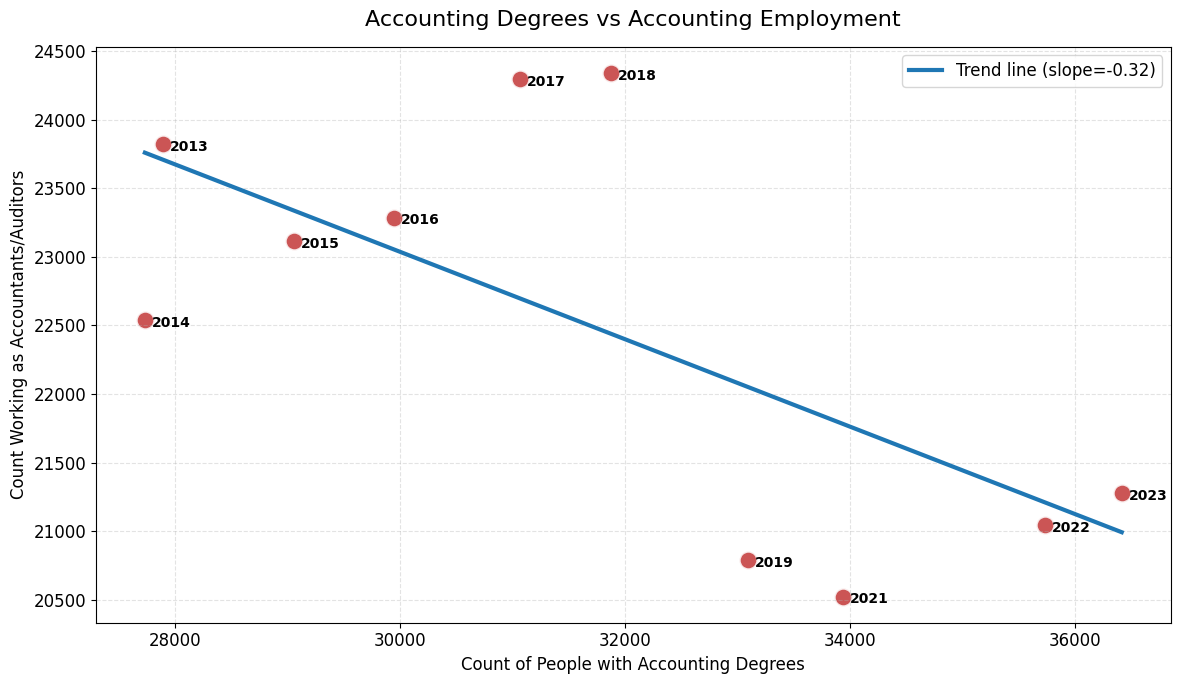

Slope: -0.3187
Intercept: 32597.7159


In [43]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Yearly counts for degrees and accountant occupations
deg_trend_raw = (
    degree.groupby("year")["is_accounting_degree"]
          .sum()
          .reset_index(name="accounting_degree_count")
)

occ_trend_raw = (
    occ_ind.groupby("year")["is_accountant_occ"]
           .sum()
           .reset_index(name="accountant_occupation_count")
)

# 2. Merge into a single table by year
trend_raw = (
    deg_trend_raw
    .merge(occ_trend_raw, on="year", how="inner")
    .sort_values("year")
)

x = trend_raw["accounting_degree_count"].values
y = trend_raw["accountant_occupation_count"].values
years = trend_raw["year"].values

# 3. Regression line
coef = np.polyfit(x, y, 1)          # slope, intercept
trend_fn = np.poly1d(coef)

# 4. Plot (formatted like your example)
plt.figure(figsize=(12, 7))

# scatter
plt.scatter(
    x, y,
    s=170,
    color="#c43d3d",
    edgecolors="white",
    linewidth=1.8,
    alpha=0.88,
)

# regression line
x_line = np.linspace(x.min(), x.max(), 100)
plt.plot(
    x_line, trend_fn(x_line),
    color="#1f77b4",
    linewidth=3,
    label=f"Trend line (slope={coef[0]:.2f})"
)

# year labels
for i, year in enumerate(years):
    plt.annotate(
        str(year),
        (x[i], y[i]),
        fontsize=10,
        fontweight="bold",
        xytext=(5, -5),
        textcoords="offset points"
    )

plt.title("Accounting Degrees vs Accounting Employment", fontsize=16, pad=15)
plt.xlabel("Count of People with Accounting Degrees", fontsize=12)
plt.ylabel("Count Working as Accountants/Auditors", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.35)
plt.legend()
plt.tight_layout()
plt.show()

print(f"Slope: {coef[0]:.4f}")
print(f"Intercept: {coef[1]:.4f}")



### 16. Run OLS regression with Statsmodels
I formally estimate a simple linear regression:

> Accounting employment = β₀ + β₁ × (count of accounting degrees) + ε

using `statsmodels.OLS`, and print the full regression output table.


In [18]:
import statsmodels.api as sm

# X = number of accounting degrees
X = trend_raw["accounting_degree_count"]

# Y = number of people working as accountants/auditors
Y = trend_raw["accountant_occupation_count"]

# Add constant term for intercept
X_const = sm.add_constant(X)

# Fit OLS regression model
model = sm.OLS(Y, X_const).fit()

# Print full statistical report
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:     accountant_occupation_count   R-squared:                       0.442
Model:                                     OLS   Adj. R-squared:                  0.372
Method:                          Least Squares   F-statistic:                     6.337
Date:                         Wed, 03 Dec 2025   Prob (F-statistic):             0.0360
Time:                                 14:45:30   Log-Likelihood:                -83.767
No. Observations:                           10   AIC:                             171.5
Df Residuals:                                8   BIC:                             172.1
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

### 17. Helper function to format coefficients with significance stars
This function appends `*`, `**`, or `***` to regression coefficients based on their p-values.


In [46]:
def coef_with_stars(coef, pval):
    """Format coefficient with significance stars like ***"""
    if pval < 0.01:
        star = "***"
    elif pval < 0.05:
        star = "**"
    elif pval < 0.1:
        star = "*"
    else:
        star = ""
    return f"{coef:,.3f}{star}"


### 18. Build a regression results table (raw DataFrame)
Here I extract the coefficient estimates, standard errors, R², and sample size from the `statsmodels` object and put them into a tidy table structure.


In [47]:
import pandas as pd
import numpy as np

# Extract model values
coef = model.params
std_err = model.bse
pvals = model.pvalues
r2 = model.rsquared
adj_r2 = model.rsquared_adj
n = int(model.nobs)

# Build formatted rows
rows = []

# Add coefficient row for X variable
xname = "Accounting Degrees"
rows.append([
    xname,
    coef_with_stars(coef["accounting_degree_count"], pvals["accounting_degree_count"]),
    f"({std_err['accounting_degree_count']:.3f})"
])

# Add constant
rows.append([
    "Constant",
    coef_with_stars(coef["const"], pvals["const"]),
    f"({std_err['const']:.3f})"
])

# Add summary rows
summary_rows = [
    ["Observations", f"{n:,}", ""],
    ["R²", f"{r2:.3f}", ""],
    ["Adjusted R²", f"{adj_r2:.3f}", ""]
]

# Create DataFrame
reg_table = pd.DataFrame(rows + summary_rows, columns=["Variable", "Coefficient", "Std. Error"])
reg_table


,Variable,Coefficient,Std. Error
0,Accounting Degrees,-0.319**,(0.127)
1,Constant,"32,597.716***",(4026.976)
2,Observations,10,
3,R²,0.442,
4,Adjusted R²,0.372,


### 19. Format the regression table for display
This step centers the text, increases the font size, and hides the index to give a clean-looking table in the notebook.


In [48]:
reg_table.style.set_properties(**{
    'text-align': 'center',
    'font-size': '14px'
}).hide(axis="index")


Variable,Coefficient,Std. Error
Accounting Degrees,-0.319**,(0.127)
Constant,"32,597.716***",(4026.976)
Observations,10,
R²,0.442,
Adjusted R²,0.372,


### 20. Final regression table with title, styling, and significance notes
This cell produces the final regression results table used in the presentation, with:
- A descriptive title
- White background and black borders
- Coefficients with significance stars
- R², adjusted R², and number of observations
- A footnote explaining the meaning of the stars


In [49]:
import pandas as pd
from IPython.display import display, Markdown

# ---- FUNCTION TO ADD SIGNIFICANCE STARS ----
def coef_with_stars(coef, pval):
    if pval < 0.01:
        star = "***"
    elif pval < 0.05:
        star = "**"
    elif pval < 0.1:
        star = "*"
    else:
        star = ""
    return f"{coef:,.3f}{star}"

# ---- BUILD TABLE CONTENT ----
coef = model.params
std_err = model.bse
pvals = model.pvalues
r2 = model.rsquared
adj_r2 = model.rsquared_adj
n = int(model.nobs)

rows = [
    ["Accounting Degrees",
     coef_with_stars(coef["accounting_degree_count"], pvals["accounting_degree_count"]),
     f"({std_err['accounting_degree_count']:.3f})"],

    ["Constant",
     coef_with_stars(coef["const"], pvals["const"]),
     f"({std_err['const']:.3f})"],

    ["Observations", f"{n:,}", ""],
    ["R²", f"{r2:.3f}", ""],
    ["Adjusted R²", f"{adj_r2:.3f}", ""]
]

reg_table = pd.DataFrame(rows, columns=["Variable", "Coefficient", "Std. Error"])

# ---- DISPLAY TITLE ----
display(Markdown("## **Accounting Degrees and Accounting Employment: OLS Regression Results**"))

# ---- DISPLAY WHITE TABLE WITH STYLING ----
display(
    reg_table.style
        .set_properties(**{
            'background-color': 'white',
            'color': 'black',
            'text-align': 'center',
            'border': '1px solid black',
            'font-size': '14px'
        })
        .hide(axis="index")
)

# ---- FOOTNOTE ----
display(Markdown("*Note:*  *p* < 0.1 = *,  *p* < 0.05 = **,  *p* < 0.01 = ***"))


## **Accounting Degrees and Accounting Employment: OLS Regression Results**

Variable,Coefficient,Std. Error
Accounting Degrees,-0.319**,(0.127)
Constant,"32,597.716***",(4026.976)
Observations,10,
R²,0.442,
Adjusted R²,0.372,


*Note:*  *p* < 0.1 = *,  *p* < 0.05 = **,  *p* < 0.01 = ***